In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

- train.csv - the training dataset; there are 7 binary targets: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults- 
test.csv - the test dataset; your objective is to predict the probability of each of the 7 binary targets

In [2]:
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv')

In [3]:
train.head(2)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
id                                                                          
0         584        590     909972     909977            16            8   
1         808        816     728350     728372           433           20   

    Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
id                                                          
0             5               2274                    113   
1            54              44478                     70   

    Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
id                         ...                                        
0                     140  ...            -0.5000           -0.0104   
1                     111  ...             0.7419           -0.2997   

    SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
id                                                                          
0           0.1417       0          0         0       1          0      0   
1           0.9491       0          0         0       0          0      0   

    Other_Faults  
id                
0              0  
1              1  

[2 rows x 34 columns]

# EDA

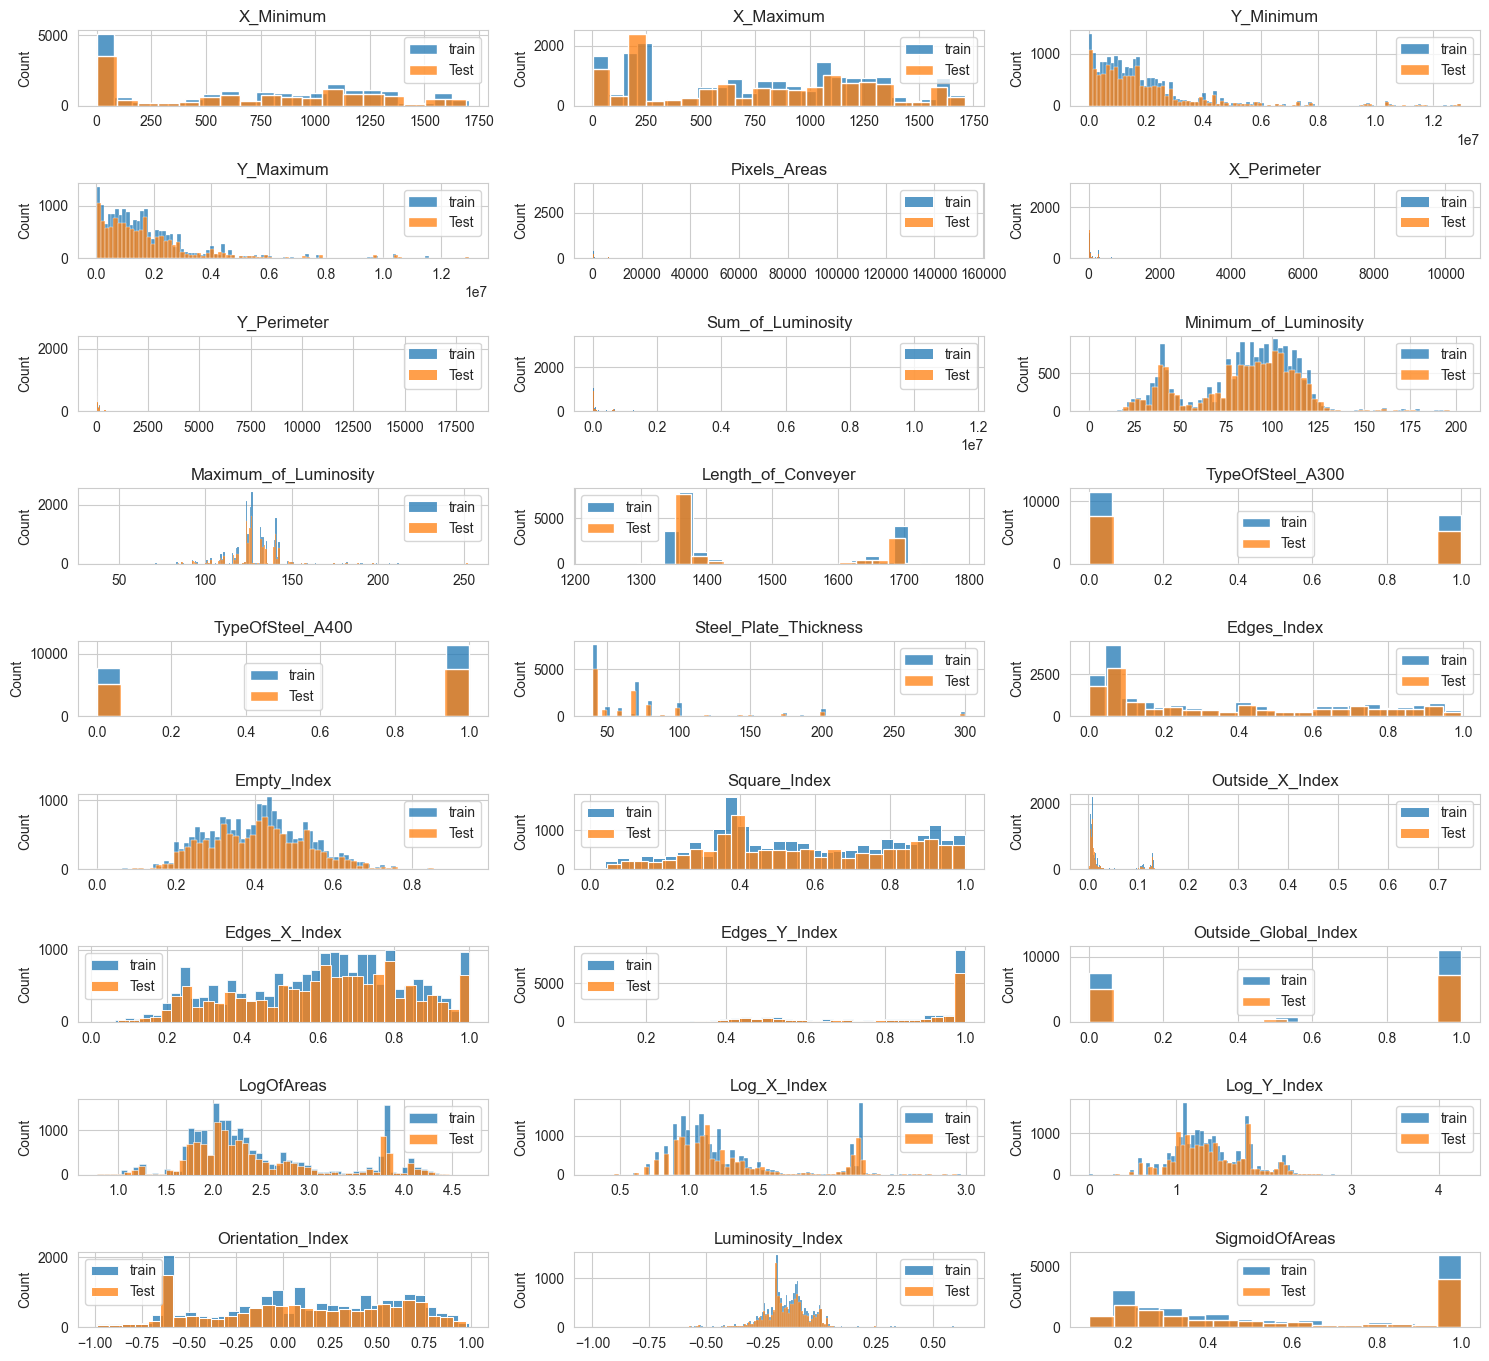

In [30]:
plt.figure(figsize=(15,15))

counter=1
sns.set_style(style='whitegrid')
for i in train.columns[:-7]:
    plt.subplot(10,3,counter)
    sns.histplot(train[i],label='train')
    sns.histplot(test[i],label='Test')
    counter += 1
    plt.title(i)
    # plt.ylabel('')
    plt.xlabel('')
    plt.legend()

    
plt.tight_layout()
plt.grid()
plt.savefig('distribution_train_test.png')
# plt.imread('distribution_train_test.png')
plt.show()

## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scl = pd.DataFrame(scaler.fit_transform(train.iloc[:,:-7]),columns=train.columns[:-7])
y = train.drop(columns=x_scl.columns)
x_scl

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0      -0.236778  -0.327831  -0.493713  -0.493938     -0.447155    -0.492949   
1       0.184647   0.124329  -0.589127  -0.589709     -0.335365    -0.425464   
2      -1.262119  -1.124112   0.190344   0.192770      2.601456     3.426816   
3       0.133850   0.070310   0.789801   0.794500     -0.395147    -0.447959   
4       1.561802   1.612854  -0.646859  -0.647650     -0.311774    -0.133028   
...          ...        ...        ...        ...           ...          ...   
19214   0.073646   0.006287  -0.896529  -0.898294     -0.446887    -0.515444   
19215   0.024731  -0.037729   0.335577   0.338530     -0.389518    -0.442336   
19216  -1.324204  -1.446226  -0.142737  -0.141583     -0.242341     0.103170   
19217  -1.318560  -1.472235  -0.071754  -0.070361     -0.417666    -0.464831   
19218   1.495955   1.542829  -0.061097  -0.059662     -0.402654    -0.402969   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0        -0.585088          -0.428885               0.978888   
1        -0.100187          -0.333403              -0.514188   
2         3.521726           2.532830              -1.937820   
3        -0.347586          -0.426785               1.013611   
4         0.028460          -0.324913              -0.097516   
...            ...                ...                    ...   
19214    -0.594984          -0.429068               1.291393   
19215    -0.377274          -0.372640               0.666384   
19216     0.335234          -0.273147              -1.521147   
19217    -0.377274          -0.400528               0.110820   
19218    -0.308002          -0.382481               0.458047   

       Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
0                   0.799671  ...        -0.522389       1.732355   
1                  -1.243070  ...        -0.554101      -1.640168   
2                   0.870111  ...         1.629799      -1.701772   
3                   0.377035  ...        -0.554101      -1.078081   
4                  -1.243070  ...        -0.241209      -1.817787   
...                      ...  ...              ...            ...   
19214               0.799671  ...        -0.554101       1.732355   
19215               0.306596  ...        -0.509704       0.533086   
19216              -2.440540  ...        -0.226410      -1.927057   
19217               0.236156  ...        -0.503361       0.694517   
19218               1.010989  ...        -0.471649       0.046093   

       Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
0           0.761892             -1.227910   -1.669010    -0.875450   
1           0.761892              0.846618    0.214350    -1.142425   
2          -2.018246             -1.227910    2.081276     1.851790   
3           0.449619              0.846618   -0.198900    -1.142425   
4           0.698985              0.846618    0.389091     0.218738   
...              ...                   ...         ...          ...   
19214      -0.143248             -1.227910   -1.634299    -1.142425   
19215       0.407077              0.846618   -0.144466    -0.579834   
19216       0.560046              0.846618    0.550421     0.253793   
19217       0.761892              0.846618   -0.490529    -0.579834   
19218       0.761892              0.846618   -0.280551    -0.356037   

       Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0        -1.703257          -1.235969          1.063494       -1.294971  
1         0.844958           1.310641         -1.340511        1.135420  
2         2.021418          -0.232212          0.365477        1.288636  
3         0.102736           1.156438          0.815864       -0.509925  
4         1.210891           1.667237         -0.890123        1.288034  
...            ...                ...               ...             ...  
19214    -1.942198          -0.503708          1.186478       -0.848265  
192

# Base

In [45]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier()

# xgb.fit(x_scl,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
# xgb.score(x_scl,y)

0.8023830584317603

In [47]:
# scaler= StandardScaler()
# test_scaled = pd.DataFrame(scaler.fit_transform(test[x_scl.columns]),columns = x_scl.columns)
# test[y.columns] = xgb.predict_proba(test_scaled)
# # test.head()

In [49]:
# submission = test[pd.read_csv('sample_submission.csv').columns]
# submission.to_csv('submission.csv',index=False)

In [50]:
# import pickle

# with open('base_xgb.pkl','wb') as f:
#     pickle.dump(xgb,f)

# Feature Selection

In [12]:
train.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
id                                                                          
0         584        590     909972     909977            16            8   
1         808        816     728350     728372           433           20   
2          39        192    2212076    2212144         11388          705   
3         781        789    3353146    3353173           210           16   
4        1540       1560     618457     618502           521           72   

    Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
id                                                          
0             5               2274                    113   
1            54              44478                     70   
2           420            1311391                     29   
3            29               3202                    114   
4            67              48231                     82   

    Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
id                         ...                                        
0                     140  ...            -0.5000           -0.0104   
1                     111  ...             0.7419           -0.2997   
2                     141  ...            -0.0105           -0.0944   
3                     134  ...             0.6667           -0.0402   
4                     111  ...             0.9158           -0.2455   

    SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
id                                                                          
0           0.1417       0          0         0       1          0      0   
1           0.9491       0          0         0       0          0      0   
2           1.0000       0          0         1       0          0      0   
3           0.4025       0          0         1       0          0      0   
4           0.9998       0          0         0       0          0      0   

    Other_Faults  
id                
0              0  
1              1  
2              0  
3              0  
4              1  

[5 rows x 34 columns]

In [51]:
model = pickle.load(open('base_xgb.pkl','rb'))
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
feature_imp = pd.Series(model.feature_importances_,index=model.feature_names_in_).sort_values(ascending=False)
feature_imp

Outside_X_Index          0.155593
TypeOfSteel_A300         0.122768
LogOfAreas               0.088396
Steel_Plate_Thickness    0.070955
Pixels_Areas             0.060152
TypeOfSteel_A400         0.050602
Length_of_Conveyer       0.041530
Orientation_Index        0.038622
X_Perimeter              0.029788
Log_Y_Index              0.029012
Edges_Y_Index            0.028010
Y_Perimeter              0.021452
Outside_Global_Index     0.021214
Minimum_of_Luminosity    0.020463
X_Maximum                0.019745
X_Minimum                0.019044
Square_Index             0.018828
Edges_Index              0.017669
Maximum_of_Luminosity    0.017526
Sum_of_Luminosity        0.017256
Log_X_Index              0.016855
Luminosity_Index         0.016758
SigmoidOfAreas           0.016140
Empty_Index              0.016012
Edges_X_Index            0.015662
Y_Minimum                0.015320
Y_Maximum                0.014625
dtype: float32

## Highly Correlated Values

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Assuming `df` is your DataFrame and it only contains numeric predictors
X = add_constant(x_scl)  # add a constant column for the intercept

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Feature"] = x_scl.columns
vif_data["VIF"] = [variance_inflation_factor(x_scl.values, i) for i in range(x_scl.shape[1])]


vif_data.sort_values('VIF',ascending=False)

Feature         VIF
11       TypeOfSteel_A300  222.902982
12       TypeOfSteel_A400  221.839614
0               X_Minimum  110.040976
1               X_Maximum   97.713838
21             LogOfAreas   22.188247
22            Log_X_Index   17.373514
3               Y_Maximum   16.714471
2               Y_Minimum   16.713791
23            Log_Y_Index   12.771040
6             Y_Perimeter   10.272592
26         SigmoidOfAreas    8.172005
5             X_Perimeter    8.068134
24      Orientation_Index    7.575850
17        Outside_X_Index    7.437210
25       Luminosity_Index    7.330989
8   Minimum_of_Luminosity    6.620068
19          Edges_Y_Index    5.173817
4            Pixels_Areas    5.010367
9   Maximum_of_Luminosity    4.264557
20   Outside_Global_Index    4.232141
7       Sum_of_Luminosity    3.629248
18          Edges_X_Index    2.576505
15            Empty_Index    1.717258
16           Square_Index    1.565673
10     Length_of_Conveyer    1.445813
14            Edges_Index    1.291505
13  Steel_Plate_Thickness    1.162946

In [54]:
drop = 'TypeOfSteel_A400,X_Maximum,LogOfAreas'.split(',')
feature_dropped = x_scl.drop(columns=drop)

In [55]:
# Impact of dropping this

xgb= XGBClassifier()
xgb.fit(feature_dropped,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
xgb.score(feature_dropped,y)

0.8124252042249857

In [64]:
pd.read_csv('submission.csv')

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  \
0      19219       1015       1033    3826564    3826588           659   
1      19220       1257       1271     419960     419973           370   
2      19221       1358       1372     117715     117724           289   
3      19222        158        168     232415     232440            80   
4      19223        559        592     544375     544389           140   
...      ...        ...        ...        ...        ...           ...   
12809  32028       1101       1116     447943     447992           313   
12810  32029       1289       1306    3149494    3149542            59   
12811  32030         41        210    1587535    1587191         16584   
12812  32031       1329       1340     702237     702267           386   
12813  32032         39        187    1859616    1859633          5480   

       X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0               23           46              62357                     67   
1               26           28              39293                     92   
2               36           32              29386                    101   
3               10           11               8586                    107   
4               19           15              15524                    103   
...            ...          ...                ...                    ...   
12809           32           37              21603                     79   
12810            9           18               5249                    113   
12811          796          522            1858162                     24   
12812           43           34              36875                     66   
12813          634          383             582040                     38   

       ...  Orientation_Index  Luminosity_Index  SigmoidOfAreas    Pastry  \
0      ...             0.6727           -0.2261          0.9172  0.443266   
1      ...             0.9063           -0.1453          0.9104  0.116378   
2      ...            -0.5238           -0.0435          0.6514  0.000219   
3      ...             0.1818           -0.0738          0.2051  0.163400   
4      ...            -0.5714           -0.0894          0.4170  0.001130   
...    ...                ...               ...             ...       ...   
12809  ...             0.7661           -0.3109          0.8894  0.032367   
12810  ...             0.7222           -0.0448          0.1954  0.069408   
12811  ...            -0.0629           -0.0801          1.0000  0.000041   
12812  ...             0.8461           -0.2629          0.7844  0.124420   
12813  ...             0.1163           -0.1052          1.0000  0.000081   

       Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  Other_Faults  
0       0.000010  0.000353  0.000003   0.005072  0.206311      0.307434  
1       0.000884  0.001132  0.000015   0.021249  0.072150      0.575240  
2       0.026469  0.036995  0.000012   0.000062  0.215041      0.473850  
3       0.000017  0.000008  0.000002   0.005674  0.277613      0.238975  
4       0.000016  0.000047  0.000040   0.000171  0.682766      0.212917  
...          ...       ...       ...        ...       ...           ...  
12809   0.029522  0.000186  0.000001   0.041731  0.210200      0.176735  
12810   0.000081  0.000362  0.000047   0.035667  0.048706      0.263527  
12811   0.000067  0.860927  0.000007   0.000017  0.000061      0.038046  
12812   0.000244  0.007357  0.000004   0.002608  0.065698      0.291197  
12813   0.001228  0.895229  0.000020   0.000008  0.000174      0.129334  

[12814 rows x 35 columns]

In [67]:
test[y.columns]=xgb.predict_proba(test_scaled[feature_dropped.columns])
test.to_csv('submission.csv',index=False)